In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
html = 'https://www.pro-football-reference.com/teams/chi/index.htm'
r = requests.get(html)
r.status_code

In [ ]:
r.encoding

In [ ]:
utf_content = r.content

In [ ]:
bear_soup = BeautifulSoup(utf_content, 'lxml')

In [ ]:
bear_soup.findAll('tr')[0].findAll('th')

In [ ]:
top = [th.get_text() for th in bear_soup.findAll('tr')[0].findAll('th')]
cols = [th.get_text() for th in bear_soup.findAll('tr')[1].findAll('th')]

In [ ]:
year = []
data = []

for i in range(2,106):
    y = [th.get_text() for th in bear_soup.findAll('tr')[i].findAll('th')]
    year.append(y)
    data.append([td.get_text() for td in bear_soup.findAll('tr')[i].findAll('td')])

    


In [ ]:
# year is a list of lists that have one value
years = [y[0] for y in year]

In [ ]:
year = pd.Series(years, name='year')
bear_data = pd.DataFrame(data, columns=cols[1:])

In [ ]:
bear_df = pd.concat((year, bear_data), axis=1)

In [ ]:
bear_df.head()

In [ ]:
bear_mask = bear_df['W'].isnull()
bear_df[bear_mask == True]

In [ ]:
bear_df = bear_df.drop([30,31,62,63,94,95])

In [ ]:
bear_df.to_csv('data/bear_data.csv')

In [ ]:
str_cols = ['Lg', 'Tm', 'Div. Finish', 'Playoffs', 'Coaches', 'AV', 'Passer', 'Rusher', 'Receiver']
num_cols = [col for col in bear_df.columns if col not in str_cols]

In [ ]:
num_bear_df = bear_df[num_cols]
num_bear_df = num_bear_df.applymap(lambda x: float(x))
num_bear_df['year'] = num_bear_df['year'].apply(lambda x: int(x))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.barplot(num_bear_df['year'], num_bear_df['PF'])
# plt.plot(num_bear_df['year'], num_bear_df['PA'],color='orange')

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))

n_years = num_bear_df.shape[0]

# fig, ax = plt.subplots()

index = np.arange(n_years)
bar_width = .50

opacity = .5

ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(num_bear_df['year'])
fig.autofmt_xdate()

pf_bar = ax.bar(index, num_bear_df['PF'], bar_width, alpha=opacity, color='midnightblue')
pa_bar = ax.bar(index, num_bear_df['PA'], bar_width, alpha=opacity, color='orange')



plt.tight_layout()
plt.show()

In [ ]:
tiny_df = num_bear_df.head(28)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

n_years = 28

# fig, ax = plt.subplots()

index = np.arange(n_years)
bar_width = .50

opacity = .5

ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(tiny_df['year'])
fig.autofmt_xdate()

pf_bar = ax.bar(index, tiny_df['PF'], bar_width, alpha=opacity, color='midnightblue')
pa_bar = ax.bar(index, tiny_df['PA'], bar_width, alpha=opacity, color='orange')

plt.tight_layout()
plt.show()

In [ ]:
bad_mask = tiny_df['PF'] > tiny_df['PA']

In [ ]:
tiny_df[bad_mask]

In [ ]:
11/28

In [6]:
pwd

'/home/jovyan/Current/WS'

In [82]:
%run lib/functions.py

In [83]:
football = FoozBall()


In [6]:
url = 'https://www.pro-football-reference.com/teams/jax/index.htm'

In [7]:
jags_ = football.get_data(url)

In [8]:
jags_df = jags_.clean()

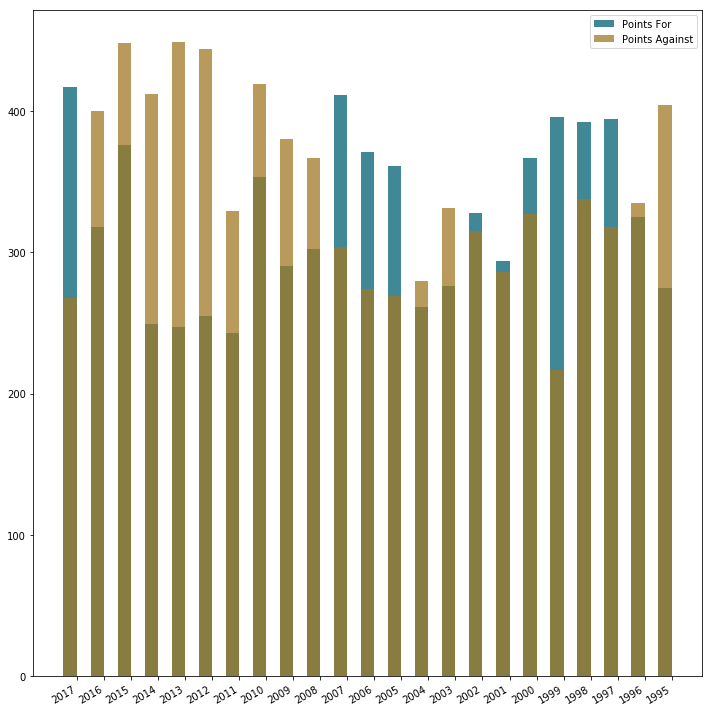

In [10]:
fig, ax = plt.subplots(figsize=(10,10))

n_years = 23

# fig, ax = plt.subplots()

index = np.arange(n_years)
bar_width = .50

opacity = .75

ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(jags_df['year'])
fig.autofmt_xdate()

pf_bar = ax.bar(index, jags_df['PF'], bar_width, alpha=opacity, color='#006073')

pa_bar = ax.bar(index, jags_df['PA'], bar_width, alpha=opacity, color='#A17925')
ax.legend(['Points For','Points Against'])



plt.tight_layout()
plt.show()

In [5]:
den_url = 'https://www.pro-football-reference.com/teams/den/'

In [6]:
%run lib/functions.py

In [7]:
football = FoozBall()

In [8]:
den_ = football.get_data(den_url)

In [9]:
den_df = den_.clean(num_only=True)

In [10]:
den_df.columns

Index(['year', 'W', 'L', 'T', 'PF', 'PA', 'PD', 'Pts', 'Pts', 'Yds', 'Yds',
       'Pts', 'Pts', 'Yds', 'Yds', 'T/G', 'Pts±', 'Yds±', 'out of', 'MoV',
       'SoS', 'SRS', 'OSRS', 'DSRS'],
      dtype='object')

In [13]:
den_.raw_data.columns

Index(['year', 'Lg', 'Tm', 'W', 'L', 'T', 'Div. Finish', 'Playoffs', 'PF',
       'PA', 'PD', 'Coaches', 'AV', 'Passer', 'Rusher', 'Receiver', 'Pts',
       'Yds', 'Pts', 'Yds', 'T/G', 'Pts±', 'Yds±', 'out of', 'MoV', 'SoS',
       'SRS', 'OSRS', 'DSRS'],
      dtype='object')

In [14]:
2**2 + 2**2 

8

In [31]:
den_.raw_data

,year,Lg,Tm,W,L,T,Div. Finish,Playoffs,PF,PA,...,Yds,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS
0,[2017],NFL,Denver Broncos,5,11,0,4th of 4,,289,382,...,3,31,27,8,32,-5.8,-0.9,-6.7,-3.9,-2.9
1,[2016],NFL,Denver Broncos,9,7,0,3rd of 4,,333,297,...,4,13,9,14,32,2.3,1.8,4.0,-2.0,6.1
2,[2015],NFL,Denver Broncos*,12,4,0,1st of 4,Won SB,355,296,...,1,19,10,3,32,3.7,2.1,5.8,0.3,5.5
3,[2014],NFL,Denver Broncos*,12,4,0,1st of 4,Lost Div,482,354,...,3,11,4,2,32,8.0,1.6,9.6,9.2,0.4
4,[2013],NFL,Denver Broncos*,13,3,0,1st of 4,Lost SB,606,399,...,19,14,1,1,32,12.9,-1.6,11.4,14.1,-2.7
5,[2012],NFL,Denver Broncos*,13,3,0,1st of 4,Lost Div,481,289,...,2,17,2,1,32,12.0,-1.9,10.1,6.3,3.8
6,[2011],NFL,Denver Broncos*,8,8,0,1st of 4,Lost Div,309,390,...,20,26,25,27,32,-5.1,-0.2,-5.3,-3.6,-1.7
7,[2010],NFL,Denver Broncos,4,12,0,4th of 4,,344,471,...,32,27,29,25,32,-7.9,-1.0,-8.9,-1.1,-7.8
8,[2009],NFL,Denver Broncos,8,8,0,2nd of 4,,326,324,...,7,7,18,13,32,0.1,0.2,0.3,-1.0,1.3
9,[2008],NFL,Denver Broncos,8,8,0,2nd of 4,,370,448,...,29,31,25,14,32,-4.9,-0.9,-5.8,0.7,-6.5


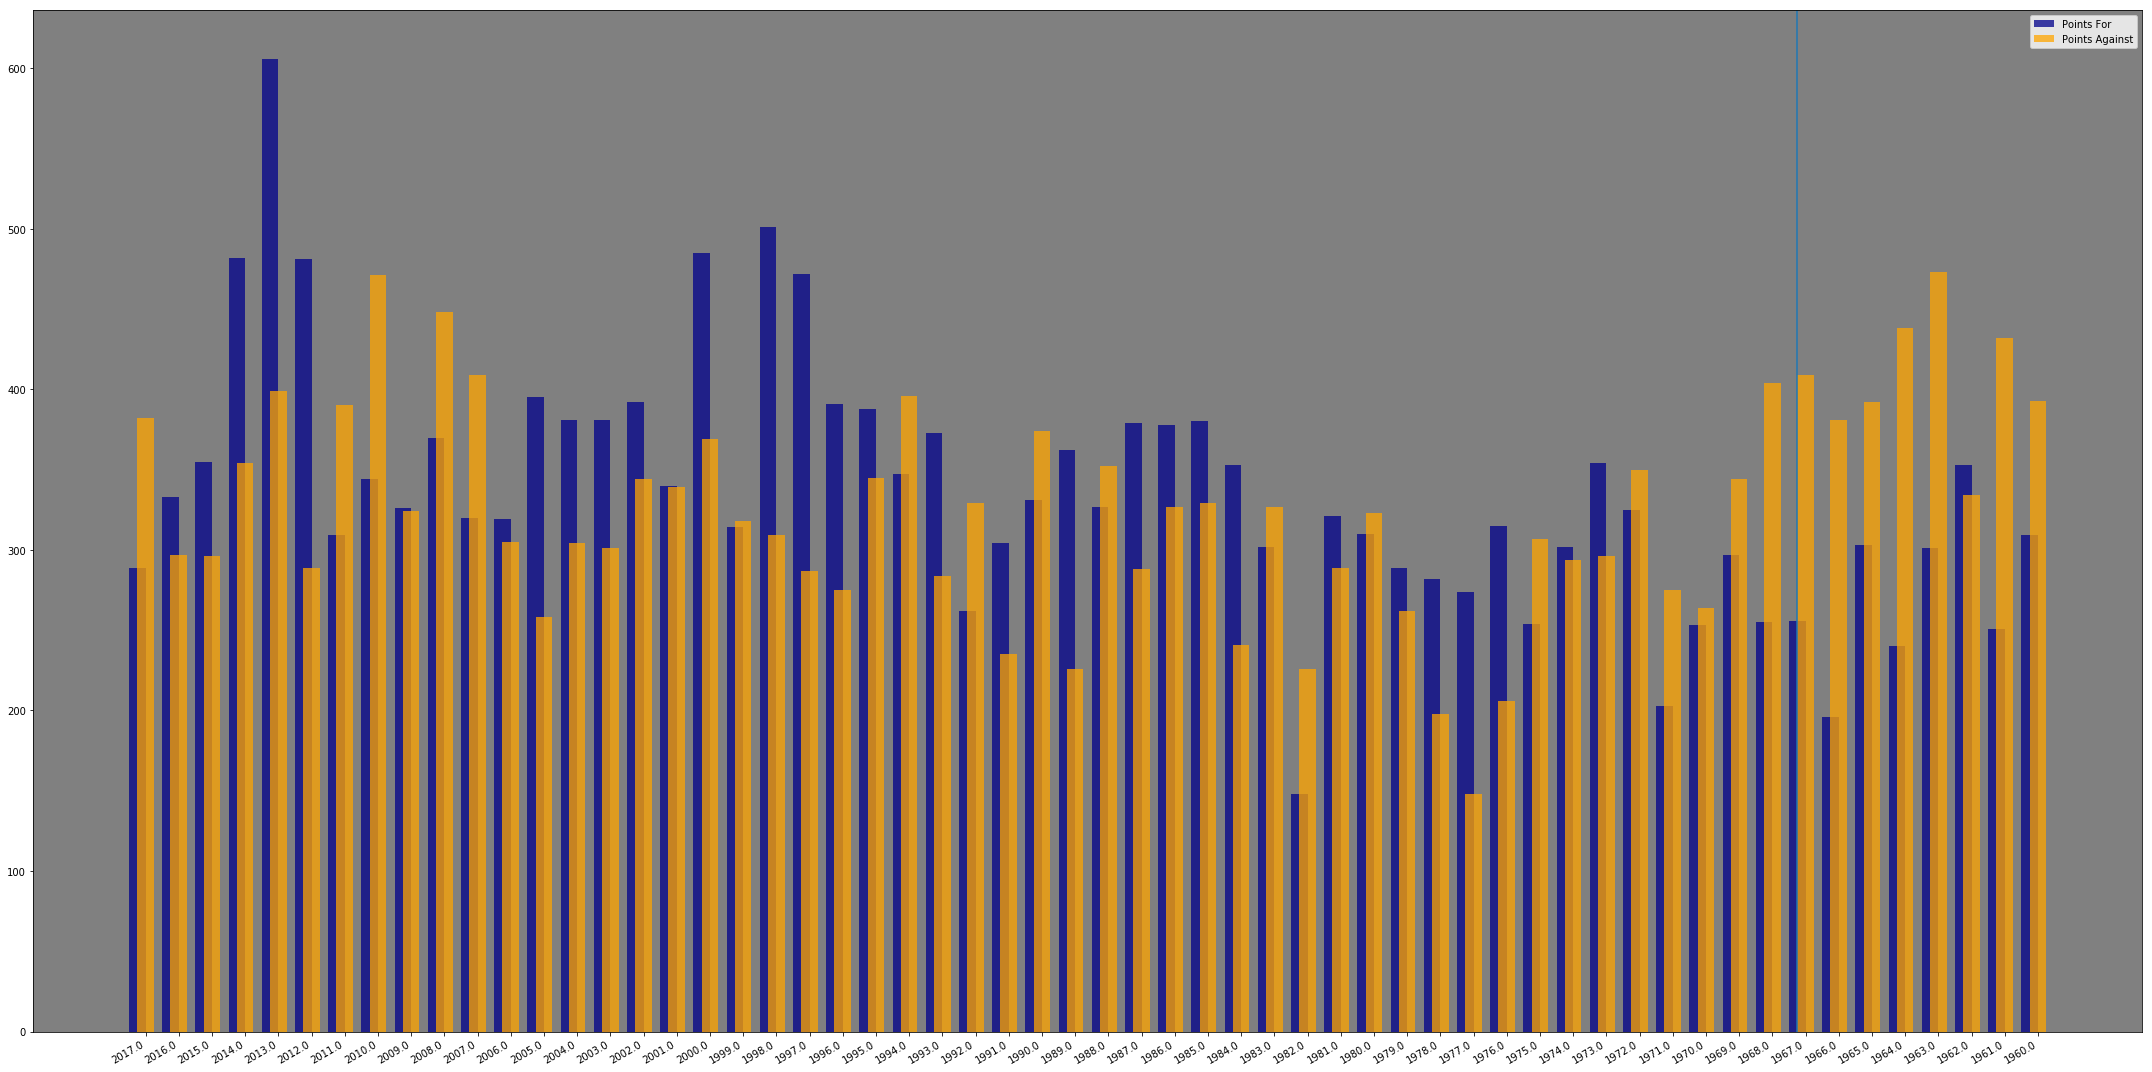

In [38]:
fig, ax = plt.subplots(figsize=(30,15))

n_years = den_df.shape[0]

# fig, ax = plt.subplots()

index = np.arange(n_years)
bar_width = .50

opacity = .75

ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(den_df['year'])
fig.autofmt_xdate()

pf_bar = ax.bar(index, den_df['PF'], bar_width, alpha=opacity, color='darkblue', align='center')

pa_bar = ax.bar(index, den_df['PA'], bar_width, alpha=opacity, color='orange', align='edge')
ax.legend(['Points For','Points Against'])
ax.set_facecolor('grey')
ax.axvline(x=50)



plt.tight_layout()
plt.show()